In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/netflix-shows/netflix_titles.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os

In [3]:
print(os.listdir('../input/netflix-shows'))

['netflix_titles.csv']


In [4]:
df=pd.read_csv('../input/netflix-shows/netflix_titles.csv')

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
show_id         6234 non-null int64
type            6234 non-null object
title           6234 non-null object
director        4265 non-null object
cast            5664 non-null object
country         5758 non-null object
date_added      6223 non-null object
release_year    6234 non-null int64
rating          6224 non-null object
duration        6234 non-null object
listed_in       6234 non-null object
description     6234 non-null object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [7]:
df.duplicated().value_counts()

False    6234
dtype: int64

Analysis of each column

In [8]:
df.show_id.duplicated().value_counts()

False    6234
Name: show_id, dtype: int64

In [9]:
df.type.unique()

array(['Movie', 'TV Show'], dtype=object)

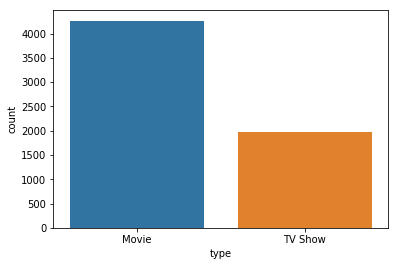

In [10]:
sns.countplot(df.type)

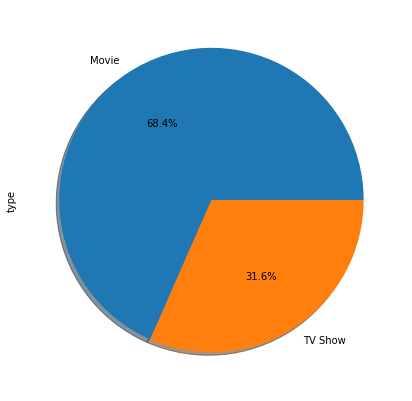

In [11]:
df['type'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(15,7))

In [12]:
df[df.duplicated(subset=['type','title','director','cast','country','date_added','release_year','rating','duration','listed_in','description'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2124,81072516,Movie,Sarkar,A.R. Murugadoss,"Vijay, Varalakshmi Sarathkumar, Keerthi Suresh...",India,"March 2, 2019",2018,TV-MA,162 min,"Action & Adventure, Dramas, International Movies",A ruthless businessman’s mission to expose ele...


In [13]:
df[df.title=='Sarkar']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2123,81075235,Movie,Sarkar,A.R. Murugadoss,"Vijay, Varalakshmi Sarathkumar, Keerthi Suresh...",India,"March 2, 2019",2018,TV-MA,162 min,"Action & Adventure, Dramas, International Movies",A ruthless businessman’s mission to expose ele...
2124,81072516,Movie,Sarkar,A.R. Murugadoss,"Vijay, Varalakshmi Sarathkumar, Keerthi Suresh...",India,"March 2, 2019",2018,TV-MA,162 min,"Action & Adventure, Dramas, International Movies",A ruthless businessman’s mission to expose ele...


In [14]:
df.drop_duplicates(subset=['type','title','director','cast','country','date_added','release_year','rating','duration','listed_in','description'],inplace=True)

In [15]:
df[df['title']=='Sarkar']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2123,81075235,Movie,Sarkar,A.R. Murugadoss,"Vijay, Varalakshmi Sarathkumar, Keerthi Suresh...",India,"March 2, 2019",2018,TV-MA,162 min,"Action & Adventure, Dramas, International Movies",A ruthless businessman’s mission to expose ele...


In [16]:
df[df['title'].duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
378,80133200,TV Show,Maniac,NaN,"Espen Petrus Andersen Lervaag, Håkon Bast Moss...",Norway,"September 1, 2017",2015,TV-MA,1 Season,"International TV Shows, TV Comedies, TV Dramas",A nondescript man in a mental hospital has an ...
843,81167047,TV Show,Tunnel,NaN,"Choi Jin-hyuk, Yoon Hyun-min, Lee Yoo-young, C...",South Korea,"October 1, 2019",2017,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Korean...","While chasing a serial murderer, a detective e..."
1066,81033200,Movie,Love,"Kabir Bhatia, Titien Wattimena","Acha Septriasa, Darius Sinathrya, Fauzi Baadil...",Indonesia,"November 30, 2018",2008,TV-PG,120 min,"Dramas, International Movies, Romantic Movies","In Jakarta, five couples of varying ages and b..."
1361,81189912,Movie,Drive,Tarun Mansukhani,"Jacqueline Fernandez, Sushant Singh Rajput, Bo...",India,"November 1, 2019",2019,TV-14,119 min,"Action & Adventure, International Movies",A notorious thief allies with a street racer f...
1597,80209866,Movie,Manhunt,John Woo,"Zhang Hanyu, Masaharu Fukuyama, Qi Wei, Ji-won...","China, Hong Kong","May 4, 2018",2017,TV-MA,109 min,"Action & Adventure, International Movies",A Chinese pharmaceutical lawyer framed for a v...
...,...,...,...,...,...,...,...,...,...,...,...,...
5930,80233218,TV Show,Kakegurui,NaN,"Minami Hamabe, Mahiro Takasugi, Aoi Morikawa",Japan,"July 4, 2019",2019,TV-14,2 Seasons,"International TV Shows, TV Dramas, TV Thrillers",Yumeko Jabami enrolls at Hyakkaou Private Acad...
5978,80103470,TV Show,Hostages,NaN,"Jonah Lotan, Ayelet Zurer, Tomer Kapon, Micha ...",Israel,"July 1, 2017",2016,TV-MA,2 Seasons,"Crime TV Shows, International TV Shows, TV Dramas",The night before a surgeon is set to operate o...
6026,80041601,TV Show,Lovesick,NaN,"Johnny Flynn, Antonia Thomas, Daniel Ings, Han...",United Kingdom,"January 1, 2018",2018,TV-MA,3 Seasons,"British TV Shows, International TV Shows, Roma...","In his quest for true love, Dylan found chlamy..."
6159,70140438,TV Show,Skins,NaN,"Kaya Scodelario, Hannah Murray, Jack O'Connell...",United Kingdom,"August 2, 2017",2013,TV-MA,7 Seasons,"British TV Shows, International TV Shows, TV D...",This incisive series centers on the tense live...


In [17]:
df['director'].unique()

array(['Richard Finn, Tim Maltby', nan, 'Fernando Lebrija', ...,
       'Vikramaditya Motwane, Anurag Kashyap', 'Jung-ah Im', 'Onur Ünlü'],
      dtype=object)

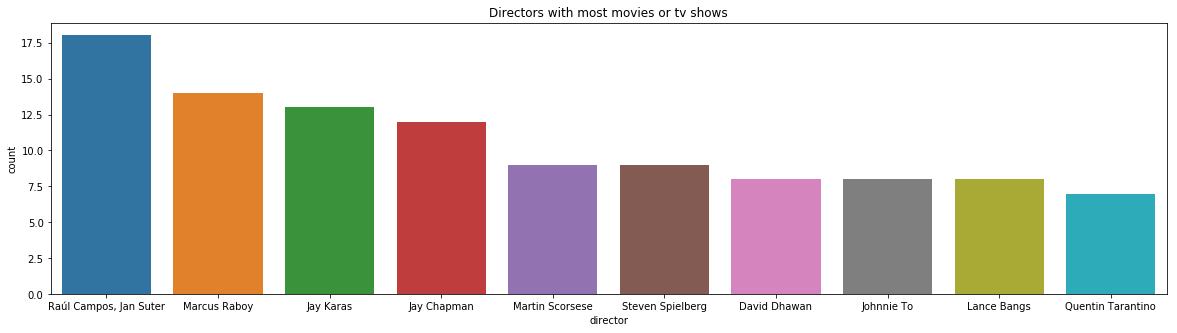

In [18]:
plt.figure(figsize=(20,5))
plt.title('Directors with most movies or tv shows')
sns.countplot(df['director'],order=df['director'].value_counts().index[0:10])

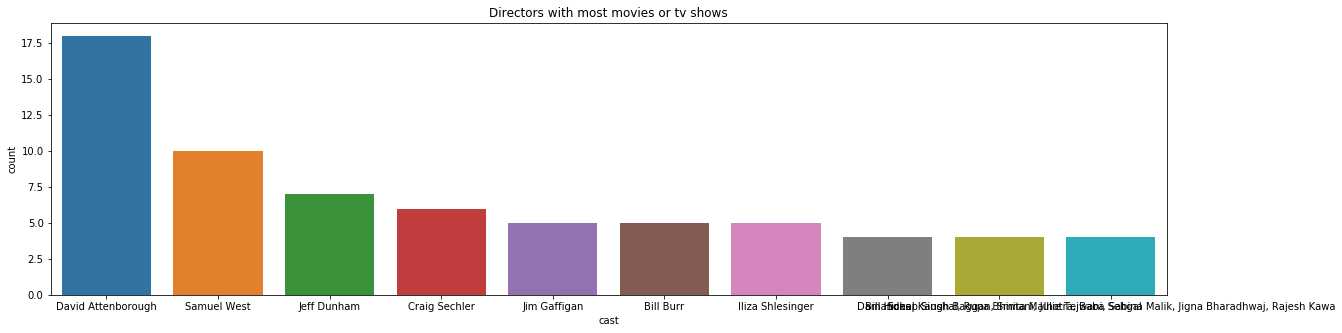

In [19]:
plt.figure(figsize=(20,5))
plt.title('Directors with most movies or tv shows')
sns.countplot(df.cast,order=df.cast.value_counts().index[0:10])

In [20]:
df.country.nunique()

554

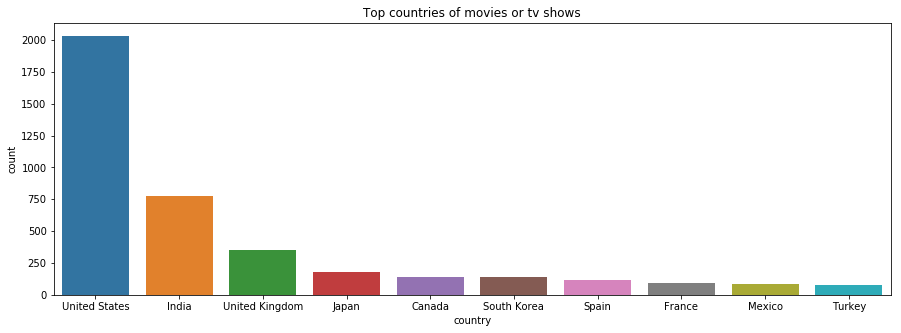

In [21]:
plt.figure(figsize=(15,5))
plt.title('Top countries of movies or tv shows')
sns.countplot(df.country,order=df.country.value_counts().index[0:10])

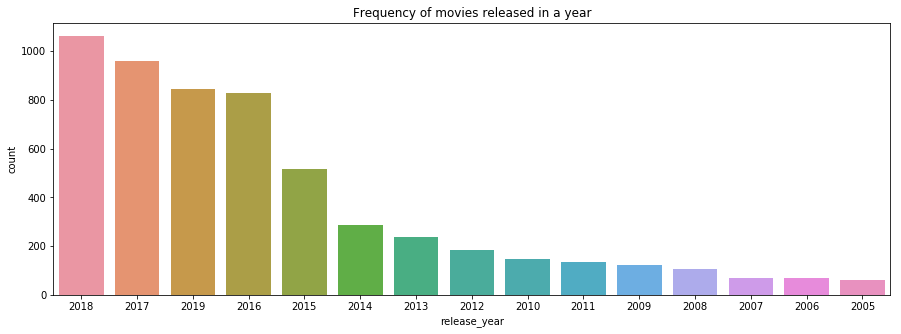

In [22]:
plt.figure(figsize=(15,5))
plt.title('Frequency of movies released in a year')
sns.countplot(df.release_year,order=df.release_year.value_counts().index[0:15])

In [23]:
df.rating.unique()

array(['TV-PG', 'TV-MA', 'TV-Y7-FV', 'TV-Y7', 'TV-14', 'R', 'TV-Y', 'NR',
       'PG-13', 'TV-G', 'PG', 'G', nan, 'UR', 'NC-17'], dtype=object)

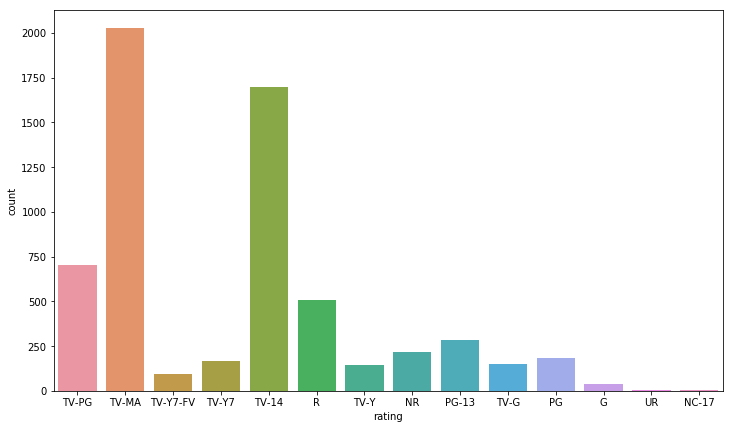

In [24]:

plt.figure(figsize=(12,7))
sns.countplot(df.rating)

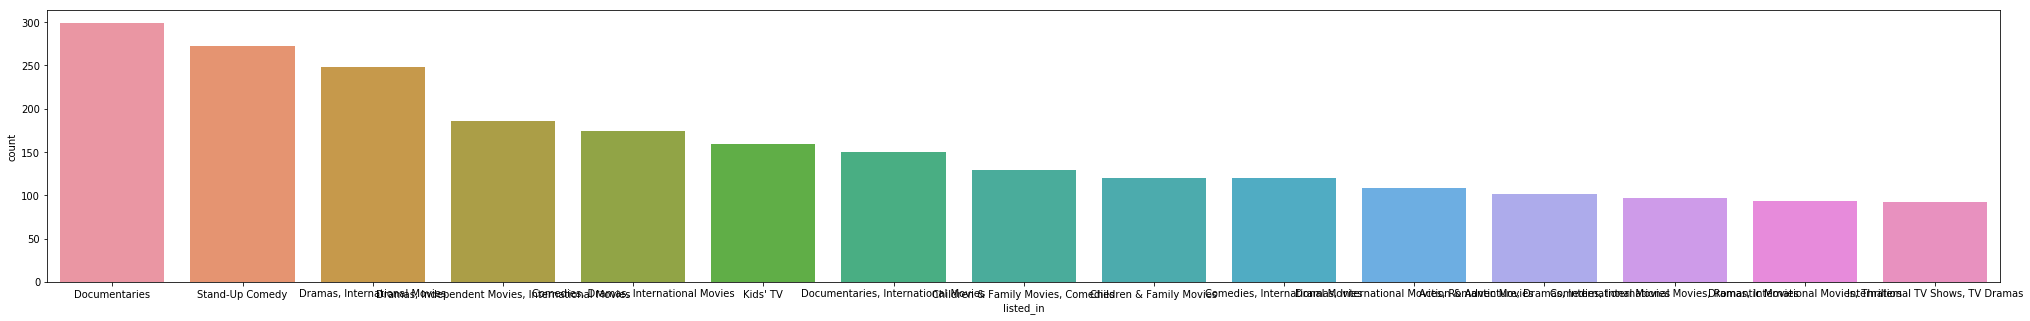

In [25]:
plt.figure(figsize=(35,5))
sns.countplot(df.listed_in,order=df.listed_in.value_counts().index[0:15])

Analyzing the type available in different countries

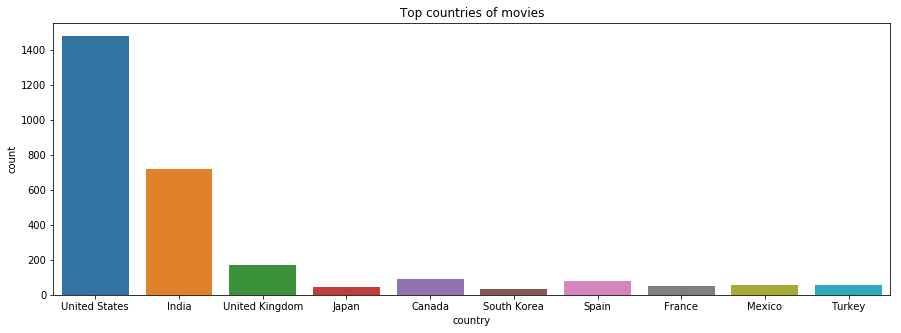

In [26]:
plt.figure(figsize=(15,5))
plt.title('Top countries of movies')
sns.countplot(df.loc[df['type']=='Movie']['country'],order=df.country.value_counts().index[0:10])

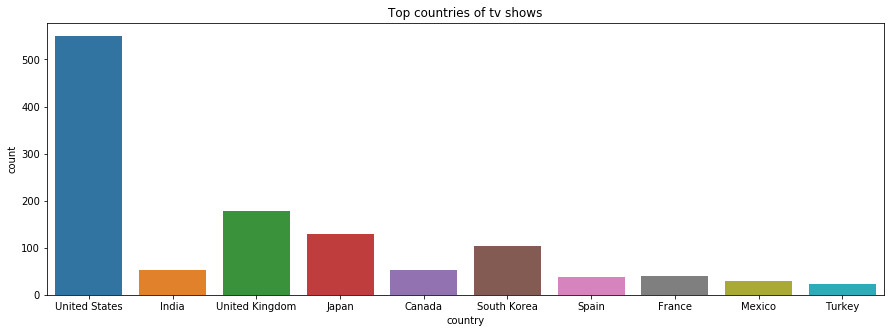

In [27]:
plt.figure(figsize=(15,5))
plt.title('Top countries of tv shows')
sns.countplot(df.loc[df['type']=='TV Show']['country'],order=df.country.value_counts().index[0:10])

It can be seen that US has most movies and TV shows. While it is important to note that UK, Japan and South Korea have more TV shows than movies and its vice versa for India.

Analyse the content added for movies

In [28]:
from collections import Counter
categories=", ".join(df.loc[df['type']=='Movie']['listed_in']).split(", ")
count_list=Counter(categories).most_common(50)

In [29]:
labels=[_[0] for _ in count_list]
values=[_[1] for _ in count_list]

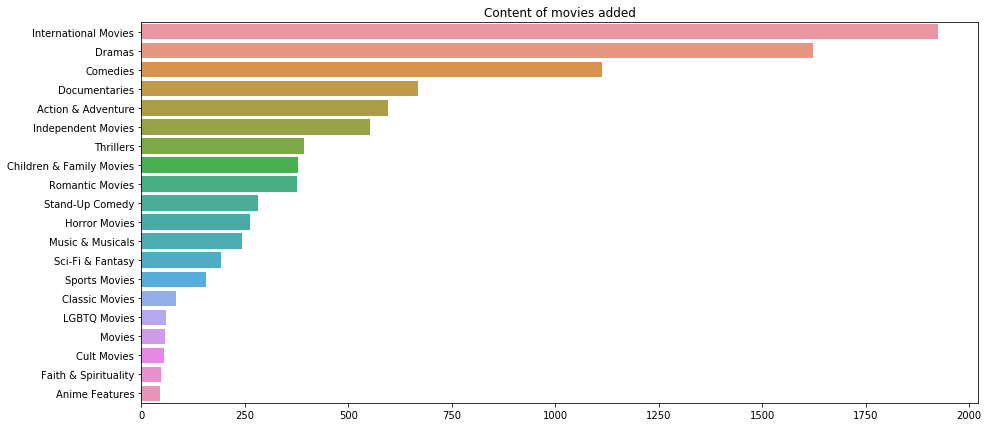

In [30]:
plt.figure(figsize=(15,7))
plt.title('Content of movies added')
sns.barplot(x=values,y=labels)

Analyze the content added for Tv shows

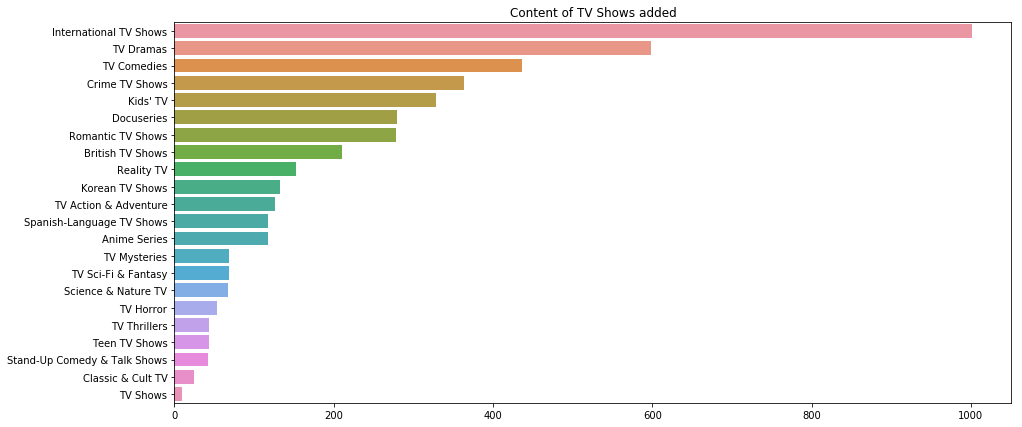

In [31]:
cat=", ".join(df.loc[df['type']=='TV Show']['listed_in']).split(", ")
count_list_tv=Counter(cat).most_common(50)
labels_tv=[_[0] for _ in count_list_tv]
values_tv=[_[1] for _ in count_list_tv]
plt.figure(figsize=(15,7))
plt.title('Content of TV Shows added')
sns.barplot(x=values_tv,y=labels_tv)

Analyze the top actors in Movies

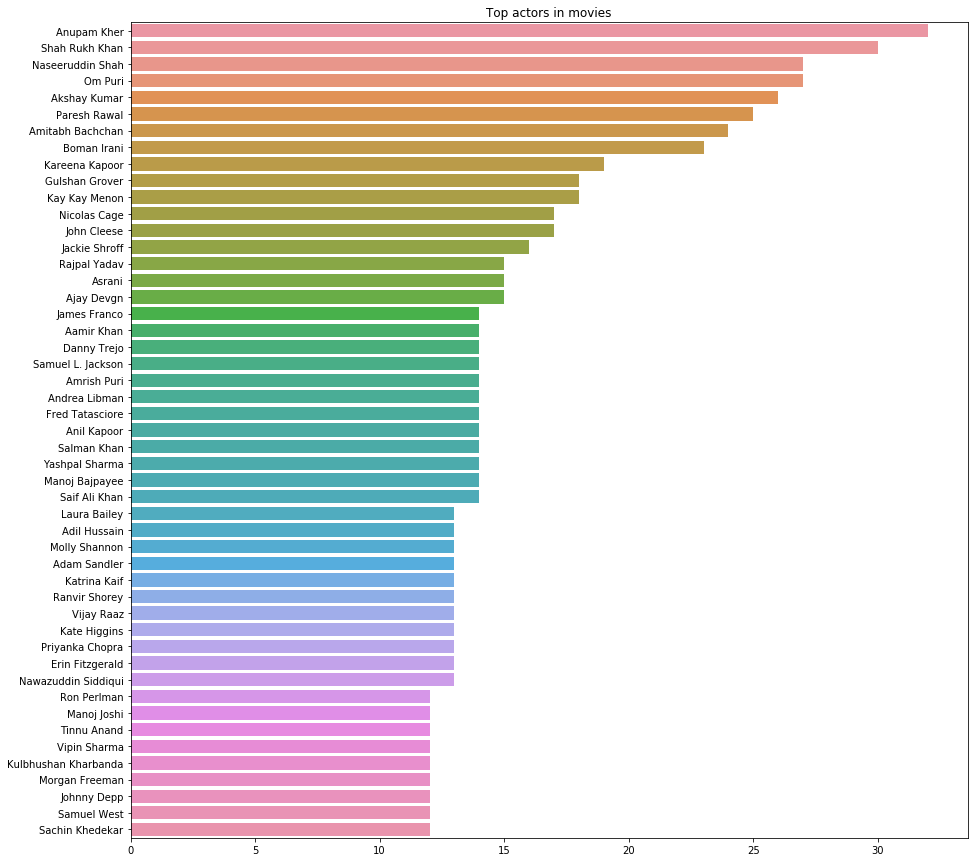

In [32]:
cat_actor=", ".join(df.loc[df['type']=='Movie']['cast'].fillna("")).split(", ")
count_list_actor=Counter(cat_actor).most_common(50)
count_list_actor=[_ for _ in count_list_actor if "" != _[0]]
labels_actor=[_[0] for _ in count_list_actor]
values_actor=[_[1] for _ in count_list_actor]
plt.figure(figsize=(15,15))
plt.title('Top actors in movies')
sns.barplot(x=values_actor,y=labels_actor)

Analyze the top actors in TV Shows

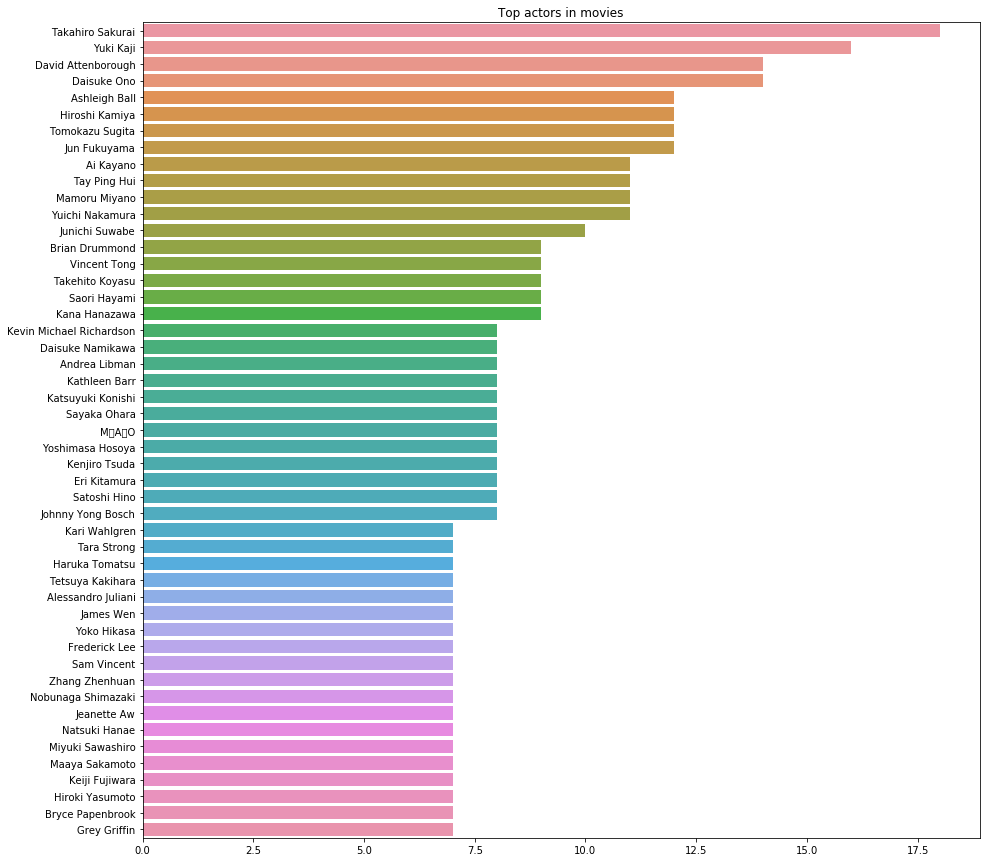

In [33]:
cat_actor_tv=", ".join(df.loc[df['type']=='TV Show']['cast'].fillna("")).split(", ")
count_list_actor_tv=Counter(cat_actor_tv).most_common(50)
count_list_actor_tv=[_ for _ in count_list_actor_tv if "" != _[0]]
labels_actor_tv=[_[0] for _ in count_list_actor_tv]
values_actor_tv=[_[1] for _ in count_list_actor_tv]
plt.figure(figsize=(15,15))
plt.title('Top actors in movies')
sns.barplot(x=values_actor_tv,y=labels_actor_tv)

In [34]:
categories

['Children & Family Movies',
 'Comedies',
 'Stand-Up Comedy',
 'Comedies',
 'International Movies',
 'Sci-Fi & Fantasy',
 'Thrillers',
 'Stand-Up Comedy',
 'Action & Adventure',
 'Thrillers',
 'Stand-Up Comedy',
 'Action & Adventure',
 'Dramas',
 'International Movies',
 'Children & Family Movies',
 'Children & Family Movies',
 'Children & Family Movies',
 'Children & Family Movies',
 'Children & Family Movies',
 'Children & Family Movies',
 'Children & Family Movies',
 'Cult Movies',
 'Dramas',
 'Independent Movies',
 'Comedies',
 'Independent Movies',
 'Romantic Movies',
 'Action & Adventure',
 'Comedies',
 'International Movies',
 'Documentaries',
 'Horror Movies',
 'Thrillers',
 'Dramas',
 'Independent Movies',
 'Dramas',
 'Independent Movies',
 'Romantic Movies',
 'Documentaries',
 'Horror Movies',
 'International Movies',
 'Children & Family Movies',
 'Comedies',
 'Sci-Fi & Fantasy',
 'Comedies',
 'Romantic Movies',
 'Dramas',
 'International Movies',
 'Thrillers',
 'Dramas',
 'I

Content added over the years

In [35]:
df['date_added']=pd.to_datetime(df['date_added'])
df['year_added']=df.date_added.dt.year

In [36]:
d1=df[df['type']=='TV Show']
d2=df[df['type']=='Movie']

vc1=d1['year_added'].value_counts().reset_index()


In [37]:
vc1=vc1.rename(columns={'year_added':"count","index":'year_added'})
vc1

,year_added,count
0,2019.0,803
1,2018.0,492
2,2017.0,387
3,2016.0,192
4,2020.0,37
5,2015.0,32
6,2014.0,6
7,2013.0,6
8,2012.0,3
9,2008.0,1


In [38]:
vc1['percent']=vc1['count'].apply(lambda x: 100*x/sum(vc1['count']))
vc1

,year_added,count,percent
0,2019.0,803,40.990301
1,2018.0,492,25.114855
2,2017.0,387,19.754977
3,2016.0,192,9.800919
4,2020.0,37,1.888719
5,2015.0,32,1.633486
6,2014.0,6,0.306279
7,2013.0,6,0.306279
8,2012.0,3,0.153139
9,2008.0,1,0.051046


In [39]:
vc1=vc1.sort_values('year_added')
vc1

,year_added,count,percent
9,2008.0,1,0.051046
8,2012.0,3,0.153139
7,2013.0,6,0.306279
6,2014.0,6,0.306279
5,2015.0,32,1.633486
3,2016.0,192,9.800919
2,2017.0,387,19.754977
1,2018.0,492,25.114855
0,2019.0,803,40.990301
4,2020.0,37,1.888719


In [40]:
vc2=d2['year_added'].value_counts().reset_index()
vc2=vc2.rename(columns={'year_added':'count','index':'year_added'})
vc2['percent']=vc2['count'].apply(lambda x: 100*x/sum(vc2['count']))
vc2.sort_values('year_added')
vc2

,year_added,count,percent
0,2019.0,1545,36.242083
1,2018.0,1290,30.260380
2,2017.0,913,21.416843
3,2016.0,264,6.192822
4,2020.0,147,3.448276
5,2015.0,58,1.360544
6,2014.0,19,0.445696
7,2011.0,13,0.304950
8,2013.0,6,0.140746
9,2012.0,4,0.093831


In [41]:
type(vc1['year_added'])

pandas.core.series.Series

In [42]:
vc1.drop(vc1[vc1['year_added']==2020].index,inplace=True)
vc2.drop(vc2[vc2['year_added']==2020].index,inplace=True)

In [43]:
import plotly.graph_objs as go

trace1 = go.Scatter(
                    x=vc1['year_added'], 
                    y=vc1["count"], 
                    name="TV Shows", 
                    marker=dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))

trace2 = go.Scatter(
                    x=vc2['year_added'], 
                    y=vc2["count"], 
                    name="Movies", 
                    marker= dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
fig = go.Figure(data = [trace1, trace2])
fig.show()

Content release over the year

In [44]:
temp_df1=df['release_year'].value_counts().reset_index()
temp_df1

,index,release_year
0,2018,1062
1,2017,959
2,2019,843
3,2016,830
4,2015,517
...,...,...
67,1959,1
68,1963,1
69,1964,1
70,1956,1


In [45]:
trace1=go.Bar(x=temp_df1['index'],y=temp_df1['release_year'])
fig=go.Figure(data=[trace1])
fig.show()